In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('/Users/Kim/SMU/MS7349/data.csv', index_col='shot_id')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Data columns (total 24 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [6]:
# Display the first and last five rows
print(df.head(5))
print(df.tail(5))

               action_type combined_shot_type  game_event_id   game_id  \
shot_id                                                                  
1                Jump Shot          Jump Shot             10  20000012   
2                Jump Shot          Jump Shot             12  20000012   
3                Jump Shot          Jump Shot             35  20000012   
4                Jump Shot          Jump Shot             43  20000012   
5        Driving Dunk Shot               Dunk            155  20000012   

             lat  loc_x  loc_y       lon  minutes_remaining  period    ...     \
shot_id                                                                ...      
1        33.9723    167     72 -118.1028                 10       1    ...      
2        34.0443   -157      0 -118.4268                 10       1    ...      
3        33.9093   -101    135 -118.3708                  7       1    ...      
4        33.8693    138    175 -118.1318                  6       1    ...  

In [7]:
# Count of Missing Data
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
dtype: int64

In [8]:
# Print columns with null value
df.columns[df.isnull().any()]

Index(['shot_made_flag'], dtype='object')

In [9]:
# Create new dataframe null shot_made_flag removed
df2 = df[df['shot_made_flag'].notnull()].reset_index()
df2.shape

(25697, 25)

In [10]:
# Create summary statistics
summary = df2.describe()

# Print the summary
print(summary)


            shot_id  game_event_id       game_id           lat         loc_x  \
count  25697.000000   25697.000000  2.569700e+04  25697.000000  25697.000000   
mean   15328.166946     249.348679  2.474109e+07     33.953043      7.148422   
std     8860.462397     149.778520  7.738108e+06      0.088152    110.073147   
min        2.000000       2.000000  2.000001e+07     33.253300   -250.000000   
25%     7646.000000     111.000000  2.050006e+07     33.884300    -67.000000   
50%    15336.000000     253.000000  2.090034e+07     33.970300      0.000000   
75%    22976.000000     367.000000  2.960027e+07     34.040300     94.000000   
max    30697.000000     653.000000  4.990009e+07     34.088300    248.000000   

              loc_y           lon  minutes_remaining        period  \
count  25697.000000  25697.000000       25697.000000  25697.000000   
mean      91.257345   -118.262652           4.886796      2.520800   
std       88.152106      0.110073           3.452475      1.151626   

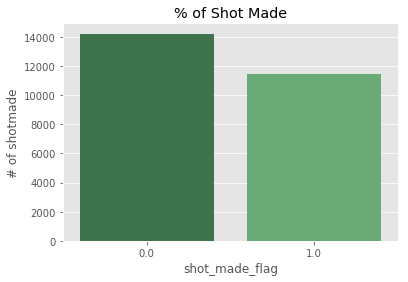

In [85]:
# number of shots - Shot_made 45% of time
sns.countplot(x='shot_made_flag', data=df2, palette="Greens_d");
plt.ylabel('# of shotmade')
plt.title('% of Shot Made')
plt.show()


In [12]:
# % of shot over total shots 
df2['shot_made_flag'].value_counts() / df2['shot_made_flag'].shape

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

In [13]:
# descriptive statistics on categorical columns
#Jump Shot is the top use technique
df2.describe(include=['object'])

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697
unique,55,6,20,2,6,7,5,1,1558,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,15836,19710,1924,20285,11289,10532,7857,25697,43,853,1638


In [14]:
# summary about the distribution of shot_made within the group
df_bygroup = df2.groupby( ['combined_shot_type'])
print(df_bygroup['shot_made_flag'].describe(include=['object']))
print ('---------------------------------------')
print(df_bygroup['shot_made_flag'].agg([np.sum, np.mean, np.std, len])) #len = count
print ('---------------------------------------')
print(df_bygroup['shot_made_flag'].value_counts() / df2['shot_made_flag'].shape)

                      count      mean       std  min  25%  50%  75%  max
combined_shot_type                                                      
Bank Shot             120.0  0.791667  0.407819  0.0  1.0  1.0  1.0  1.0
Dunk                 1056.0  0.928030  0.258560  0.0  1.0  1.0  1.0  1.0
Hook Shot             127.0  0.535433  0.500718  0.0  0.0  1.0  1.0  1.0
Jump Shot           19710.0  0.391071  0.488003  0.0  0.0  0.0  1.0  1.0
Layup                4532.0  0.565093  0.495800  0.0  0.0  1.0  1.0  1.0
Tip Shot              152.0  0.348684  0.478129  0.0  0.0  0.0  1.0  1.0
---------------------------------------
                       sum      mean       std      len
combined_shot_type                                     
Bank Shot             95.0  0.791667  0.407819    120.0
Dunk                 980.0  0.928030  0.258560   1056.0
Hook Shot             68.0  0.535433  0.500718    127.0
Jump Shot           7708.0  0.391071  0.488003  19710.0
Layup               2561.0  0.565093  0.

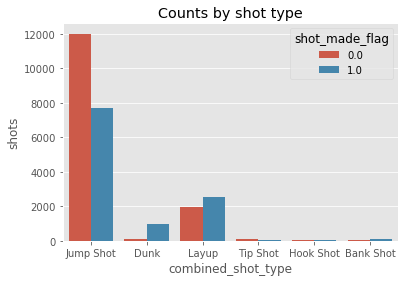

In [86]:
# Bar chart on shot_made by combined_shot_type
# Jump Short is the most preformed shot type but has the lowest shot_completion mean indicated in hbar
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=df2)
plt.ylabel('shots')
plt.title('Counts by shot type')
plt.show()

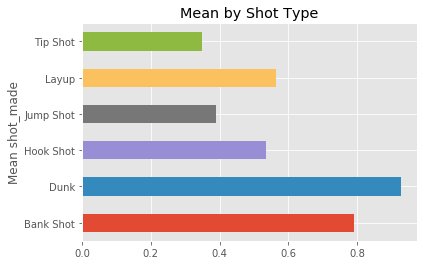

In [87]:
#Accuracy by shot_type 
# Dunk has the highest shot_completion

st = df2['shot_made_flag'].groupby(df2['combined_shot_type']).mean()
st.plot(kind='barh', figsize=(6, 4))
plt.ylabel('Mean shot_made')
plt.title('Mean by Shot Type')

shot_made_flag             0         1
combined_shot_type                    
Bank Shot           0.000973  0.003697
Dunk                0.002958  0.038137
Hook Shot           0.002296  0.002646
Jump Shot           0.467058  0.299957
Layup               0.076702  0.099661
Tip Shot            0.003853  0.002062
---------------------------------------
shot_made_flag         0         1
shot_type                         
2PT Field Goal  0.522652  0.477348
3PT Field Goal  0.670732  0.329268
---------------------------------------
shot_made_flag                            0         1
shot_type      combined_shot_type                    
2PT Field Goal Bank Shot           0.001686  0.008286
               Dunk                0.005340  0.085478
               Hook Shot           0.004146  0.005931
               Jump Shot           0.588322  0.516877
               Layup               0.138491  0.223375
               Tip Shot            0.006956  0.004623
3PT Field Goal Bank Shot           0

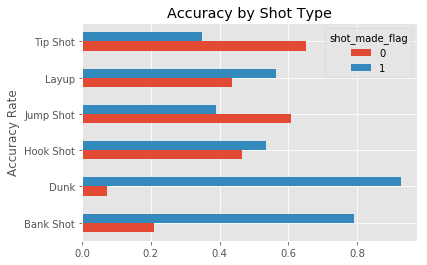

In [91]:
# Most performed action type is Jump Shot in both 2 and 3 point field goal

st_count = pd.crosstab([ df2['combined_shot_type'] ], 
                     df2.shot_made_flag.astype(int), normalize='all')
st_count2 = pd.crosstab([ df2['shot_type']], 
                   df2.shot_made_flag.astype(int), normalize='index')
st_count3 = pd.crosstab([ df2['shot_type'],df2['combined_shot_type'] ], 
                   df2.shot_made_flag.astype(int), normalize='columns')
print (st_count)
print ('---------------------------------------')

print (st_count2)
print ('---------------------------------------')

print (st_count3)
print ('---------------------------------------')

# divide the counts to get rates
st_accuracy = st_count.div(st_count.sum(1).astype(float),axis=0)
print (st_accuracy)
print ('---------------------------------------')
st_accuracy.plot(kind='barh', 
                   stacked=False)
plt.ylabel('Accuracy Rate')
plt.title('Accuracy by Shot Type')

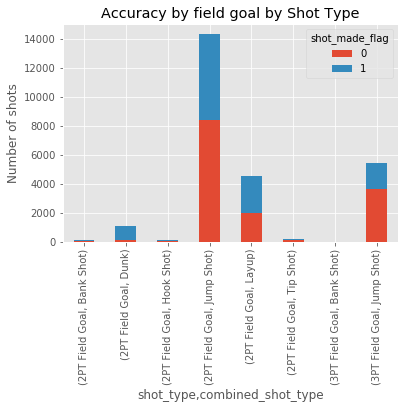

In [37]:
# cross tabulate example from http://nbviewer.ipython.org/gist/fonnesbeck/5850463# 
st_accuracy.plot(kind='bar', stacked=True)
plt.ylabel('Number of shots')
plt.title('Accuracy by field goal by Shot Type')


In [92]:
# Create Dummy variables for list of categorical labels
#cols_d = df2[['action_type','combined_shot_type','season','shot_type','shot_zone_area','shot_zone_basic',
#          'shot_zone_range','team_name','game_date','matchup']]
cols_d = df2[['action_type','combined_shot_type','season','shot_type']]

dummies = pd.get_dummies(cols_d)


In [93]:
# drop orginal categorical columns and append dummy columns
df_d = df2.drop(['action_type','combined_shot_type','season','shot_type','shot_zone_area','shot_zone_basic','shot_zone_range',
            'team_name','game_date','matchup'],axis=1)
df_dummie = df_d.join(dummies)
df_dummie.head(5)


,shot_id,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,...,season_2008-09,season_2009-10,season_2010-11,season_2011-12,season_2012-13,season_2013-14,season_2014-15,season_2015-16,shot_type_2PT Field Goal,shot_type_3PT Field Goal
0,2,12,20000012,34.0443,-157,0,-118.4268,10,1,0,...,0,0,0,0,0,0,0,0,1,0
1,3,35,20000012,33.9093,-101,135,-118.3708,7,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4,43,20000012,33.8693,138,175,-118.1318,6,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5,155,20000012,34.0443,0,0,-118.2698,6,2,0,...,0,0,0,0,0,0,0,0,1,0
4,6,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,...,0,0,0,0,0,0,0,0,1,0


In [210]:
df3 = df[(df.shot_made_flag == 1) & (df.combined_shot_type =="Jump Shot")]
df3.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
9,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,1.0,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
12,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,1.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA
13,Running Jump Shot,Jump Shot,27,20000019,33.9343,-67,110,-118.3368,7,1,...,1.0,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA
18,Jump Shot,Jump Shot,138,20000019,33.8183,-117,226,-118.3868,8,2,...,1.0,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA


In [226]:
shot_type= pd.crosstab(index=df3["shot_made_flag"], 
                             columns=[df3["combined_shot_type"],
                                      df3["season"]],
                             margins=True)   # Include row and column totals


shot_type

combined_shot_type Jump Shot                                                  \
season               1996-97 1997-98 1998-99 1999-00 2000-01 2001-02 2002-03   
shot_made_flag                                                                 
1.0                       94     184     213     380     488     510     554   
All                       94     184     213     380     488     510     554   

combined_shot_type                          ...                           \
season             2003-04 2004-05 2005-06  ...  2007-08 2008-09 2009-10   
shot_made_flag                              ...                            
1.0                    336     300     631  ...      545     594     573   
All                    336     300     631  ...      545     594     573   

combined_shot_type                                                   All  
season             2010-11 2011-12 2012-13 2013-14 2014-15 2015-16        
shot_made_flag                                                            
1.0                    503     448     399      15     170     272  7708  
All                    503     448     399      15     170     272  7708  

[2 rows x 21 columns]

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 8 Text yticklabel objects>)

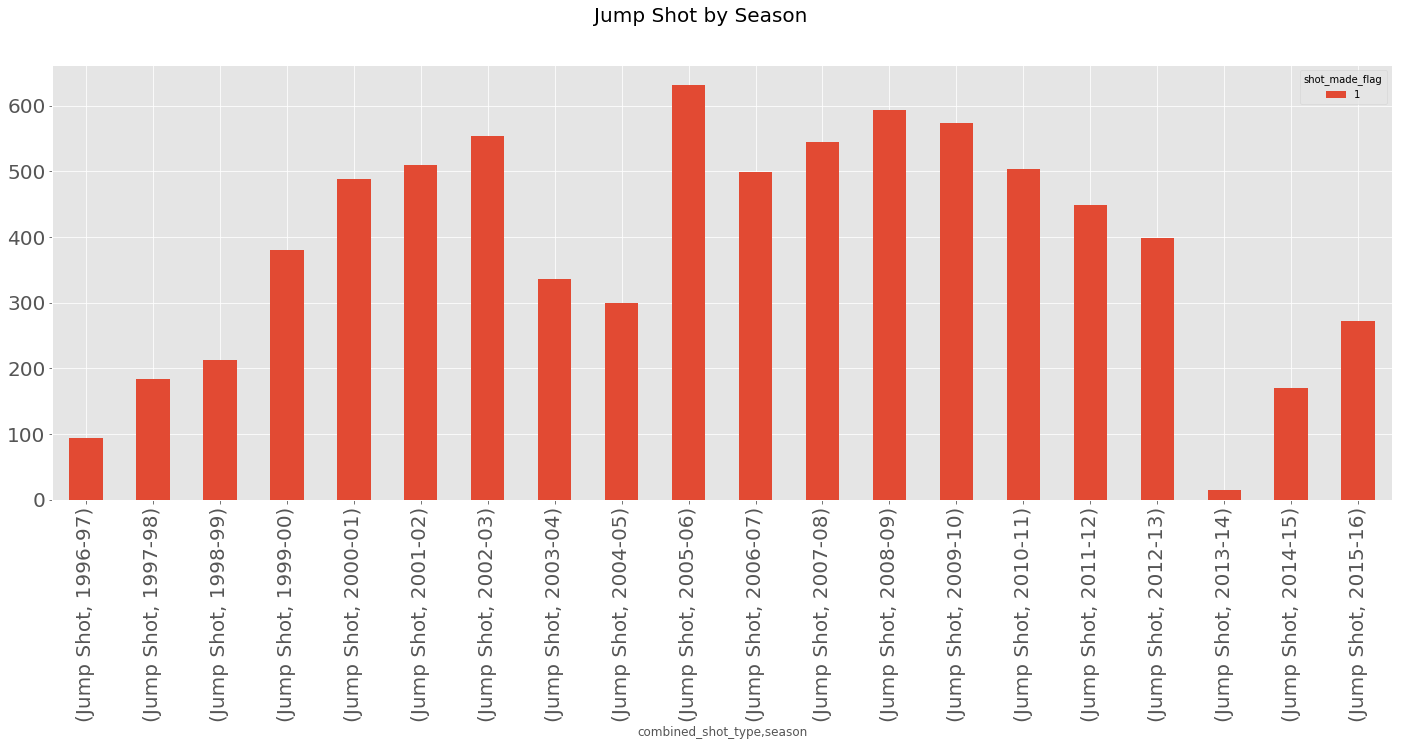

In [229]:
js_season = pd.crosstab([ df3['combined_shot_type'],df3['season'] ], 
                   df3.shot_made_flag.astype(int))
js_season.plot(kind="bar", 
                 figsize=(24,8),
                 stacked=False)

plt.suptitle('Jump Shot by Season', fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)


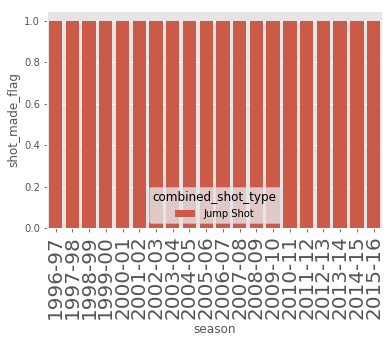

In [237]:
# now stack and reset
stacked = js_season.stack().reset_index().rename(columns={0:'value'})

 # plot grouped bar chart
sns.barplot(x=stacked.season, y=stacked.shot_made_flag, hue=stacked.combined_shot_type)
plt.xticks(fontsize=20, rotation=90)
figsize=(24,8)
